# Machine Learning Method

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import  matplotlib.pyplot as plt
import  seaborn as sbn


In [2]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.sum().isnull()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [4]:
df.shape

(150, 6)

In [5]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
df = df.drop(columns = ['Id'])

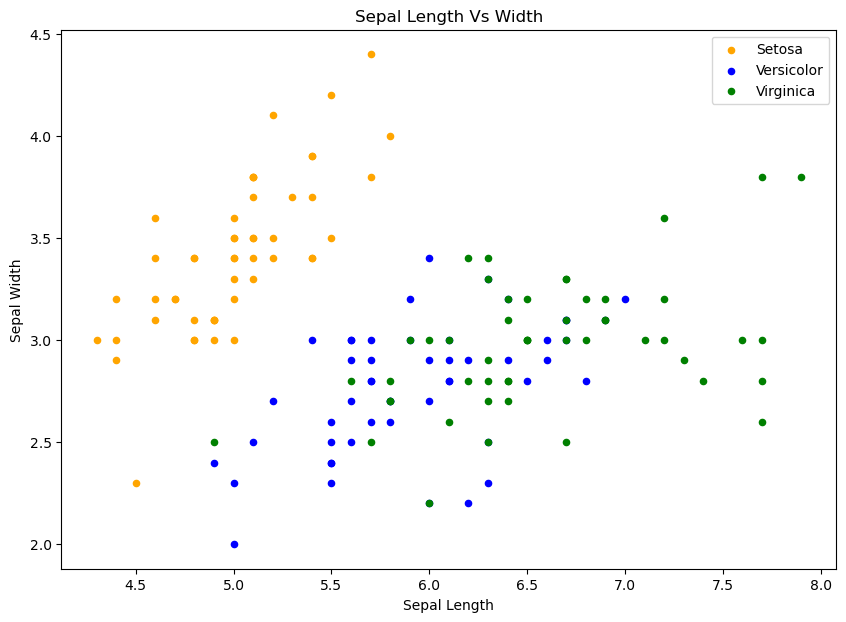

In [23]:
fig = df[df['Species'] == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
df[df['Species'] == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
df[df['Species'] == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

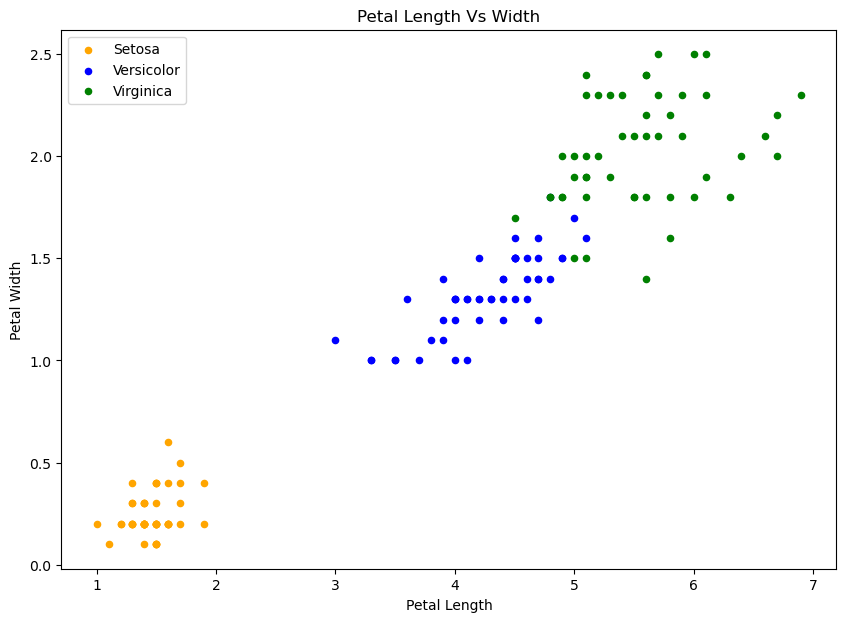

In [24]:
fig = df[df['Species'] == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
df[df['Species'] == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
df[df['Species'] == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)


fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()


array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

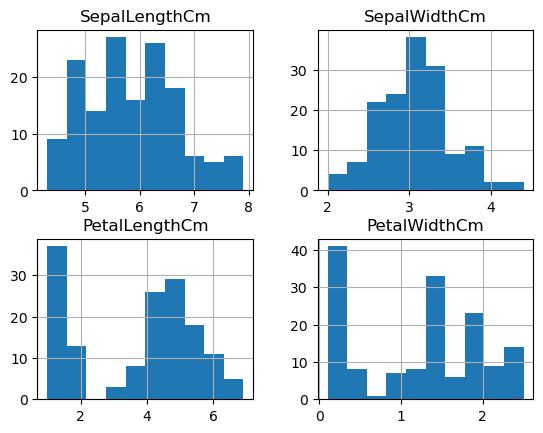

In [8]:
df.hist()

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='inferno')

C:\Users\youne\AppData\Local\Temp\ipykernel_16536\433875536.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [11]:
X = df.drop(columns = ['Species']).values
y = df["Species"]

In [12]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3,random_state=3)

In [13]:
from sklearn.tree import DecisionTreeClassifier
clasTree = DecisionTreeClassifier()
clasTree.fit(X_trainset,y_trainset)
predTree = clasTree.predict(X_testset)

In [14]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9777777777777777


In [15]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Classifier
tree_clf = DecisionTreeClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy')

# Fit the model with the data
grid_search.fit(X_trainset, y_trainset)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a new model with the best hyperparameters
best_tree_clf = DecisionTreeClassifier(**best_params)
best_tree_clf.fit(X_trainset, y_trainset)

# Make predictions on the test set
best_predTree = best_tree_clf.predict(X_testset)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}


In [16]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, best_predTree))

DecisionTrees's Accuracy:  0.9555555555555556


Confusion matrix:
[[17  0  0]
 [ 1 13  0]
 [ 0  1 13]]


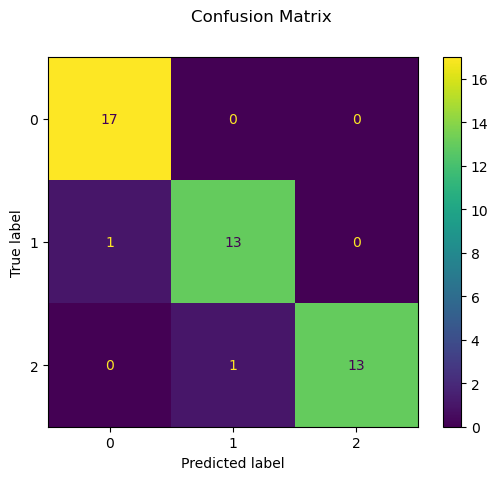

In [17]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_testset, best_predTree)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

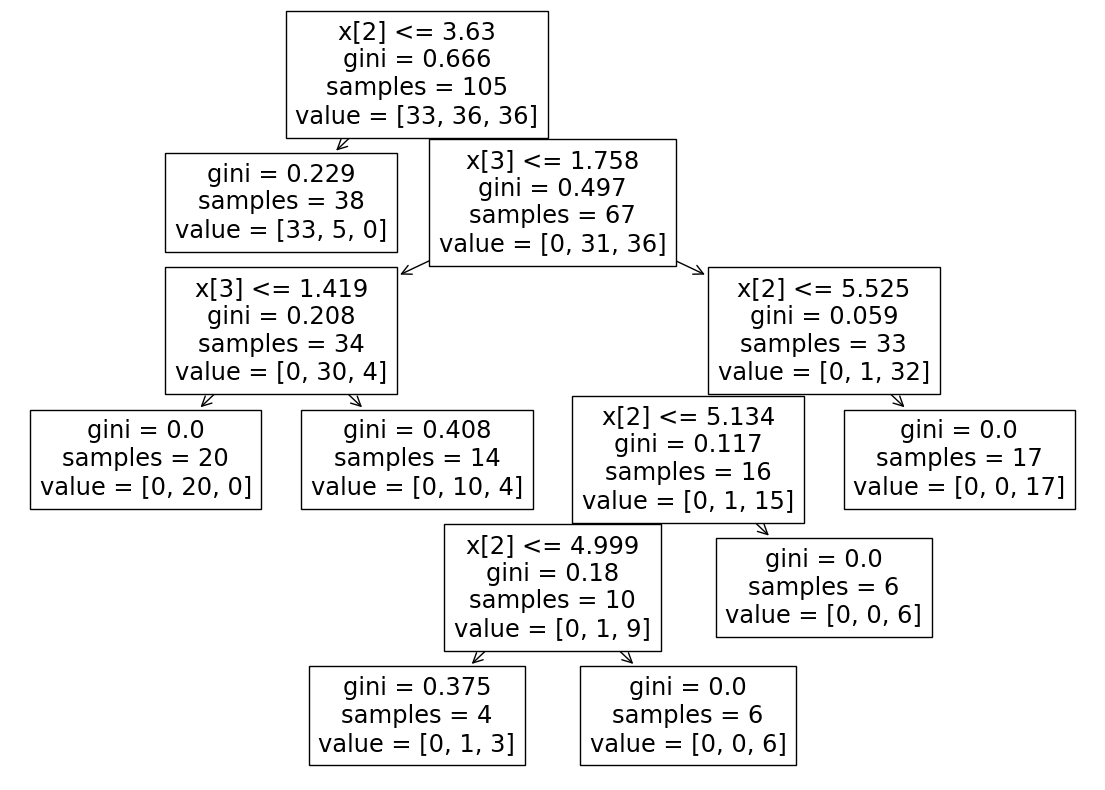

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = (14,10)
import sklearn.tree as tree
tree.plot_tree(best_tree_clf)
plt.show()

In [19]:
import pickle

with open('task6.pkl', 'wb') as f:
     pickle.dump(best_tree_clf, f)

# Deep Learning Method

In [20]:
import torch
import torch.nn.functional as F
import torch.nn as nn



class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x
    
torch.manual_seed(41)
model = Model()

In [22]:
y = df["Species"].values

In [23]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3,random_state=3)

In [24]:
X_trainset = torch.FloatTensor(X_trainset)
X_testset = torch.FloatTensor(X_testset)
y_trainset = torch.LongTensor(y_trainset)
y_testset = torch.LongTensor(y_testset)

In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [26]:
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_trainset) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_trainset) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.123147964477539
Epoch: 10 and loss: 1.0139423608779907
Epoch: 20 and loss: 0.8272760510444641
Epoch: 30 and loss: 0.6061227917671204
Epoch: 40 and loss: 0.41924959421157837
Epoch: 50 and loss: 0.2861540913581848
Epoch: 60 and loss: 0.19344106316566467
Epoch: 70 and loss: 0.13505427539348602
Epoch: 80 and loss: 0.0990515872836113
Epoch: 90 and loss: 0.07889413088560104


Text(0.5, 0, 'Epoch')

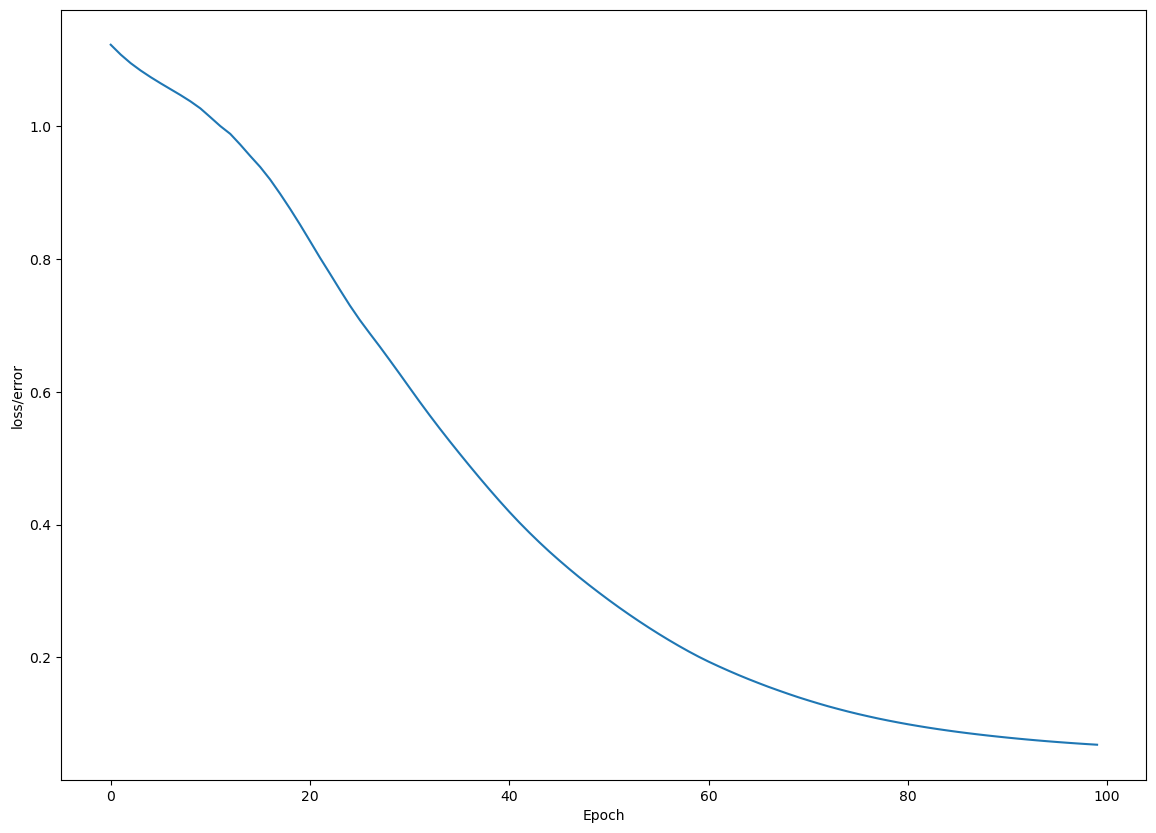

In [27]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [70]:
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_testset) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_testset)

In [48]:
# Ensure your model is in evaluation mode
model.eval()

# Make predictions on the test set
with torch.no_grad():
    y_pred_test = model(X_testset)

# Convert predictions to class labels
_, predicted_labels = torch.max(y_pred_test, 1)

# Calculate accuracy
correct_predictions = (predicted_labels == y_testset).sum().item()
total_samples = len(y_testset)
accuracy = correct_predictions / total_samples

print(f"Accuracy on the test set: {accuracy}")


Accuracy on the test set: 0.9777777777777777
